In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Rudan\Desktop\Amazon Sales Data -python\Python_Amazon_Sales_Analysis-main\Amazon Sale Report.csv")

In [4]:
df.shape


(128976, 21)

In [13]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul


# Data Cleaning


In [11]:
df.drop(["New",'PendingS'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [15]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [17]:
df.dropna(inplace = True)

In [20]:
pd.isnull(df).sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [22]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [23]:
df["ship-postal-code"]=df["ship-postal-code"].astype(int)

In [33]:
df["Date"]=pd.to_datetime(df["Date"],format="dd-mm-yyy hh:mm")

In [34]:
df["Date"].dtype

dtype('<M8[ns]')

In [ ]:
df.rename(columns={"Qty":"Quantity"})

In [35]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [36]:
df.describe(include=object)

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


# Exploratory Data Aalysis & Visulization

In [43]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

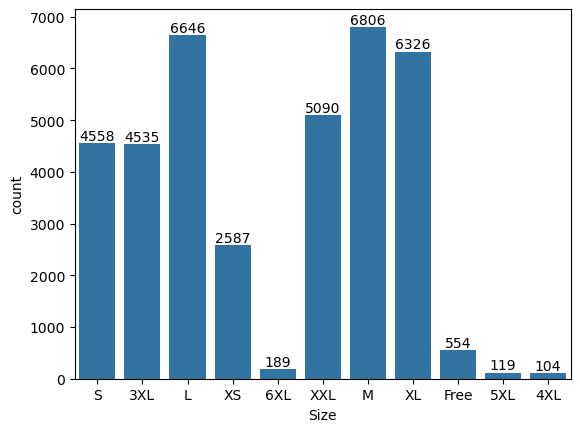

In [55]:
ax = sns.countplot(x="Size",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

##### Conclusion : Most of the people by M-size

In [75]:
size_Qty=df.groupby(["Size"],as_index=False)["Qty"].sum().sort_values(by="Qty",ascending=False)
# df_data=size_Qty.to_frame()

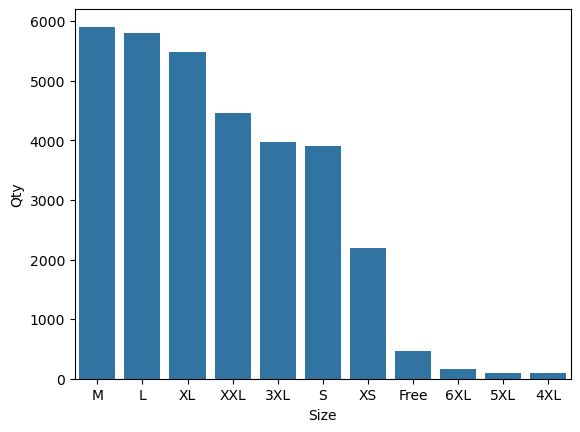

In [76]:
sns.barplot(x="Size", y="Qty",data=size_Qty)
plt.show()

##### Conclusion : Most of the Quentity buys M-size sales

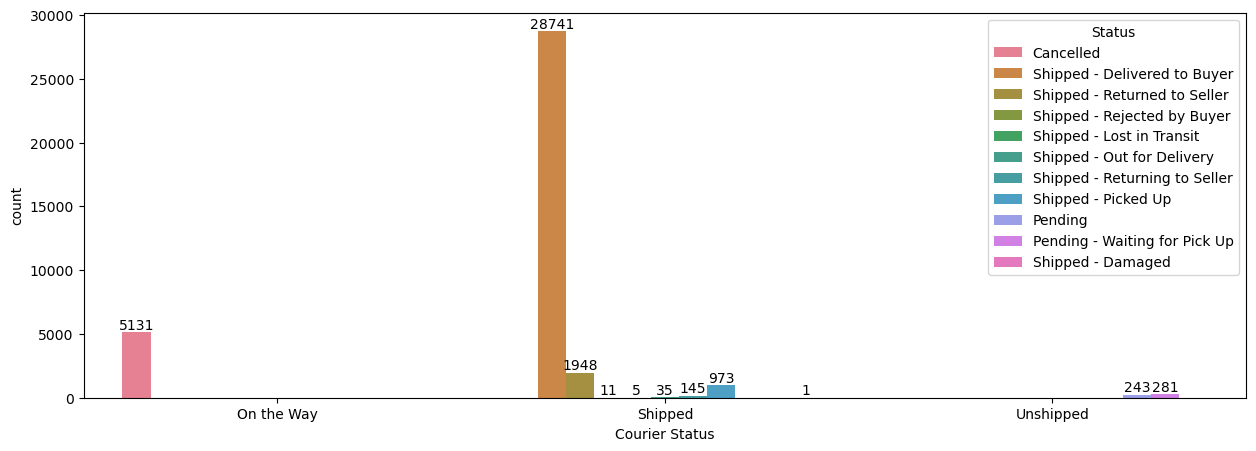

In [86]:
plt.figure(figsize=(15,5))
Courier_Status=sns.countplot(data=df,x="Courier Status",hue="Status")

for bars in Courier_Status.containers:
    Courier_Status.bar_label(bars)

plt.show()

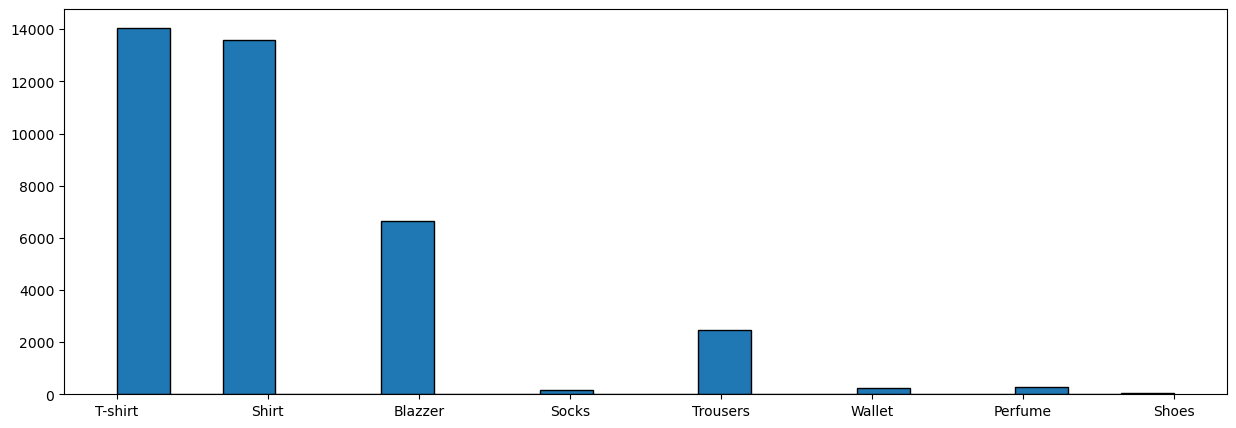

In [93]:
df["Category"]=df["Category"].astype(str)
column_data=df["Category"]
plt.figure(figsize=(15,5))
plt.hist(column_data,bins=20,edgecolor="black")
plt.show()

##### Conclusion : Most of the people Buy T-shirts

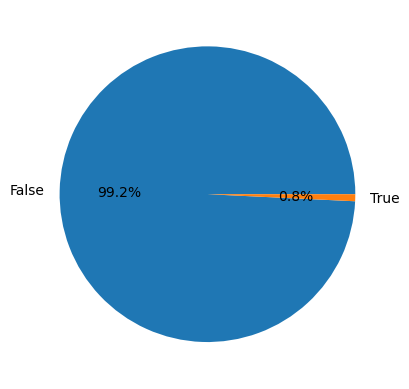

In [100]:
B2B_check=df["B2B"].value_counts()

plt.pie(B2B_check,labels=B2B_check.index,autopct="%1.1f%%")
plt.show()

##### Concusion : Maximum (99.2%) buyers are retailers and rest of (0.8%) buyes are B2B

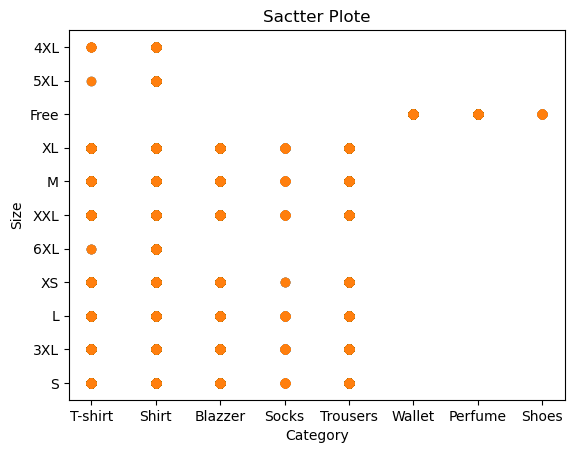

In [104]:
plt.scatter(df["Category"],df["Size"])
plt.xlabel("Category")
plt.ylabel("Size")
plt.title("Sactter Plote")
plt.show()

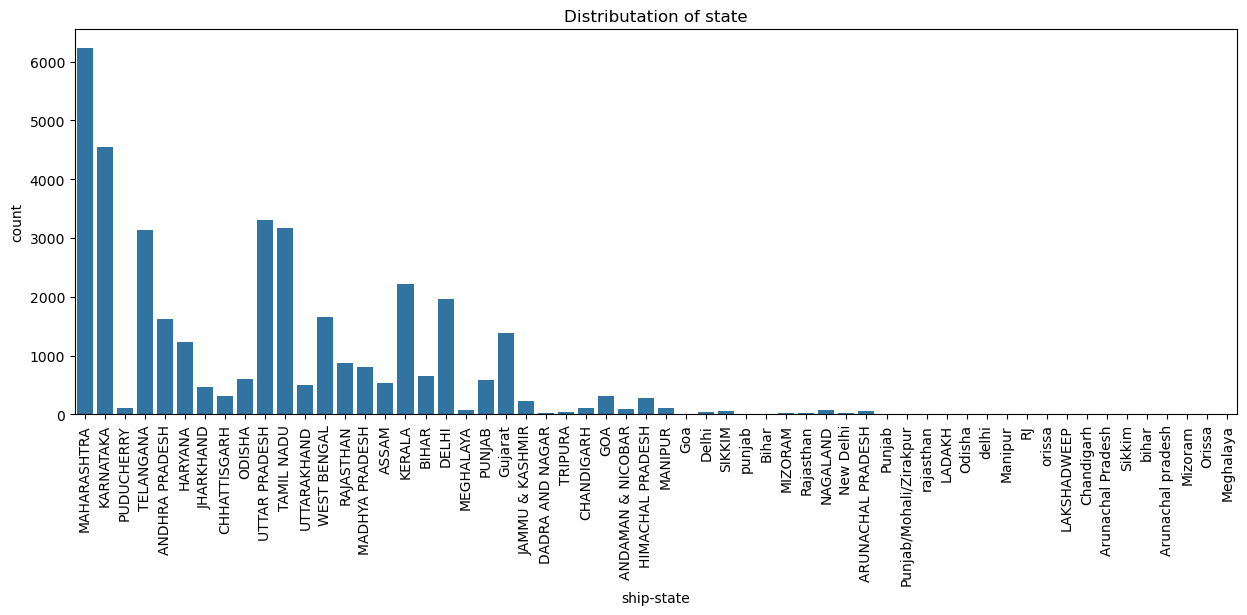

In [107]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="ship-state")
plt.xlabel("ship-state")
plt.ylabel("count")
plt.title("Distributation of state")
plt.xticks(rotation=90)
plt.show()

##### Conclusion : Most of the buyers are from Maharashtra State

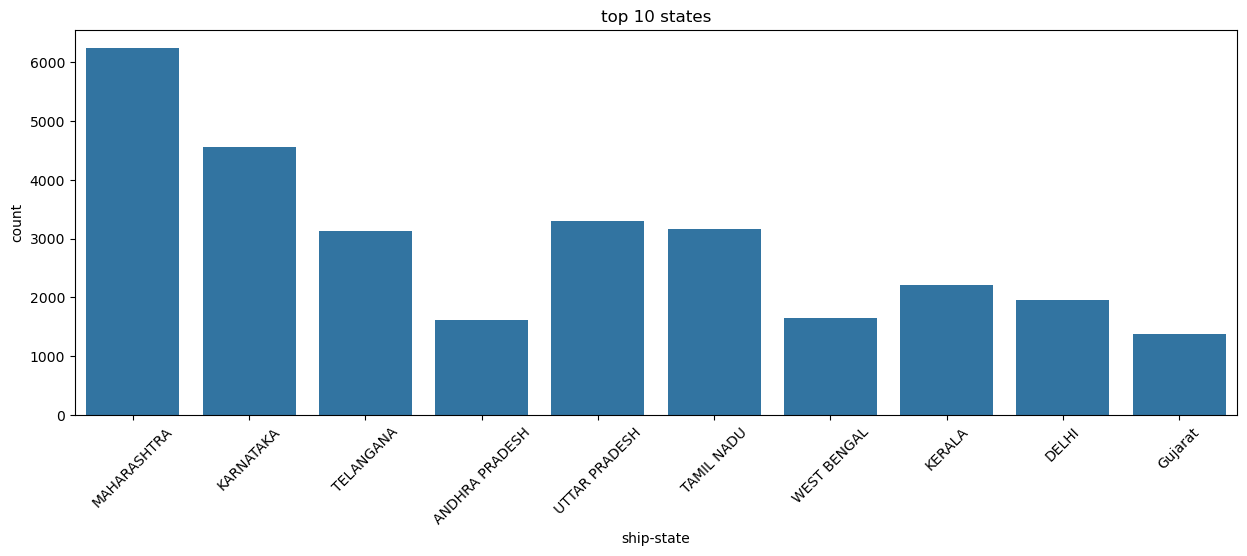

In [115]:
top_10_states=df["ship-state"].value_counts().head(10)

plt.figure(figsize=(15,5))
sns.countplot(data=df[df["ship-state"].isin(top_10_states.index)],x="ship-state")
plt.xlabel("ship-state")
plt.ylabel("count")
plt.title("top 10 states")
plt.xticks(rotation=45)
plt.show()

# Final Conclusion

##### Amazon has a significant customer based in Maharastra State , mainly serves retailers , fulfills order through Amazon, experiences high demand for T-shirts and sees M-size as the preferred choice among buyers.